## DATA MINING ETH 2 by SHREYA RAJPAL 21BBS0202

## Question 1
1. Analyze crime data using AR and ARIMA time series techniques on reported
incidents of crime based on time and location. Prepare a detailed real time
dataset for any specific location and apply ARIMA to predict any.


Synthetic crime dataset saved to 'synthetic_crime_data.csv'.


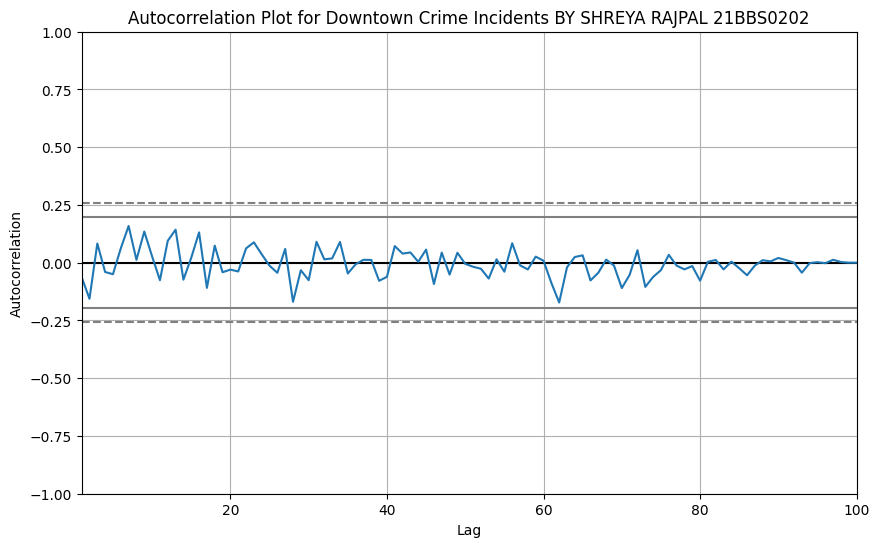

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:         Incident_Count   No. Observations:                  100
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -216.117
Date:                Sun, 17 Nov 2024   AIC                            444.233
Time:                        21:26:05   BIC                            459.804
Sample:                    01-01-2023   HQIC                           450.533
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8643      0.101     -8.568      0.000      -1.062      -0.667
ar.L2         -0.8301      0.131     -6.325      0.000      -1.087      -0.573
ar.L3         -0.5598      0.15

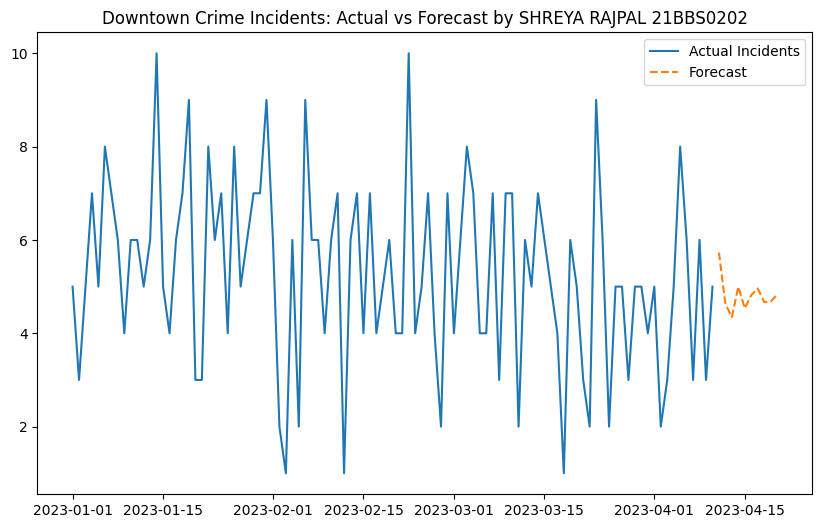

Processed time series data for 'Downtown' saved to 'downtown_crime_time_series.csv'.


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Generate Synthetic Crime Dataset
np.random.seed(42)

# Create a date range for 100 days
dates = pd.date_range(start="2023-01-01", periods=100)

# Choose number of locations (5 or 10)
locations = [
    "Downtown", "Suburb", "Industrial Area", "Residential Zone", "City Center",
    "Eastside", "Westside", "Uptown", "Rural Outskirts", "Metro Hub"
][:5]  # Use first 5 or [:10] for 10 locations

# Generate random crime types
crime_types = ["Assault", "Burglary", "Theft", "Vandalism", "Drug Offense"]

# Generate synthetic data
data = []
for date in dates:
    for location in locations:
        daily_incidents = np.random.poisson(lam=5)  # Average 5 incidents per day
        for _ in range(daily_incidents):
            data.append({
                "Date": date,
                "Location": location,
                "Crime_Type": np.random.choice(crime_types),
                "Severity": np.random.choice(["Low", "Medium", "High"], p=[0.5, 0.3, 0.2]),
            })

# Convert to DataFrame
crime_data = pd.DataFrame(data)

# Summarize data for time-series analysis (total incidents per day per location)
time_series_data = crime_data.groupby(['Date', 'Location']).size().reset_index(name='Incident_Count')

# Save synthetic dataset
crime_data.to_csv("synthetic_crime_data.csv", index=False)
print("Synthetic crime dataset saved to 'synthetic_crime_data.csv'.")

# ARIMA for a specific location
# Select data for 'Downtown'
downtown_data = time_series_data[time_series_data['Location'] == 'Downtown']
downtown_data.set_index('Date', inplace=True)

# Ensure data has a consistent time index
downtown_series = downtown_data['Incident_Count'].asfreq('D', fill_value=0)

# Autocorrelation Plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(downtown_series)
plt.title("Autocorrelation Plot for Downtown Crime Incidents BY SHREYA RAJPAL 21BBS0202")
plt.show()

# Fit ARIMA Model
arima_model = ARIMA(downtown_series, order=(5, 1, 0))  # ARIMA(5,1,0)
arima_fit = arima_model.fit()

# Print ARIMA Model Summary
print("ARIMA Model Summary:")
print(arima_fit.summary())

# Forecast future incidents
forecast = arima_fit.forecast(steps=10)  # Predict the next 10 days
print("Next 10 Days Forecast for Downtown:\n", forecast)

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(downtown_series, label="Actual Incidents")
plt.plot(forecast, label="Forecast", linestyle='--')
plt.title("Downtown Crime Incidents: Actual vs Forecast by SHREYA RAJPAL 21BBS0202")
plt.legend()
plt.show()

# Save time-series processed data
downtown_series.to_csv("downtown_crime_time_series.csv", index=True)
print("Processed time series data for 'Downtown' saved to 'downtown_crime_time_series.csv'.")


## Question 2
2.Use any package and display the visuals of the following on the dataset referred
in Question1.
Moving Average,
Simple moving average,
Autoregressive Moving Average,
exponential moving average
Weighted moving average
Hull Moving Average
Moving average crossover 

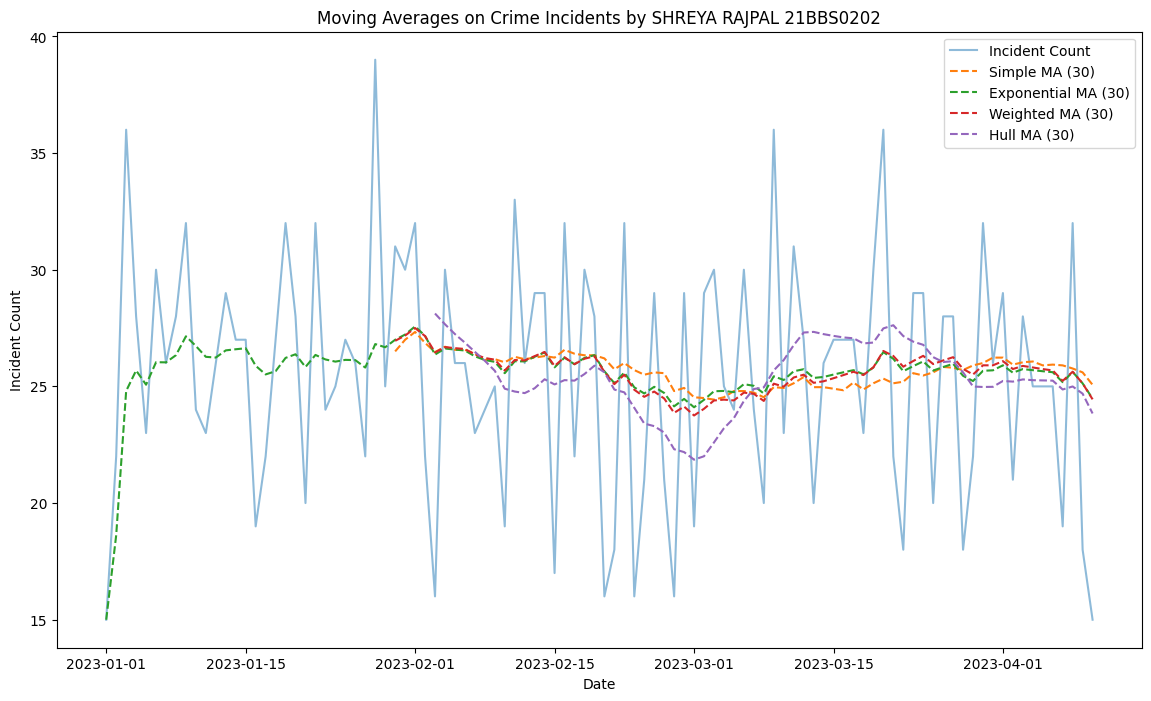

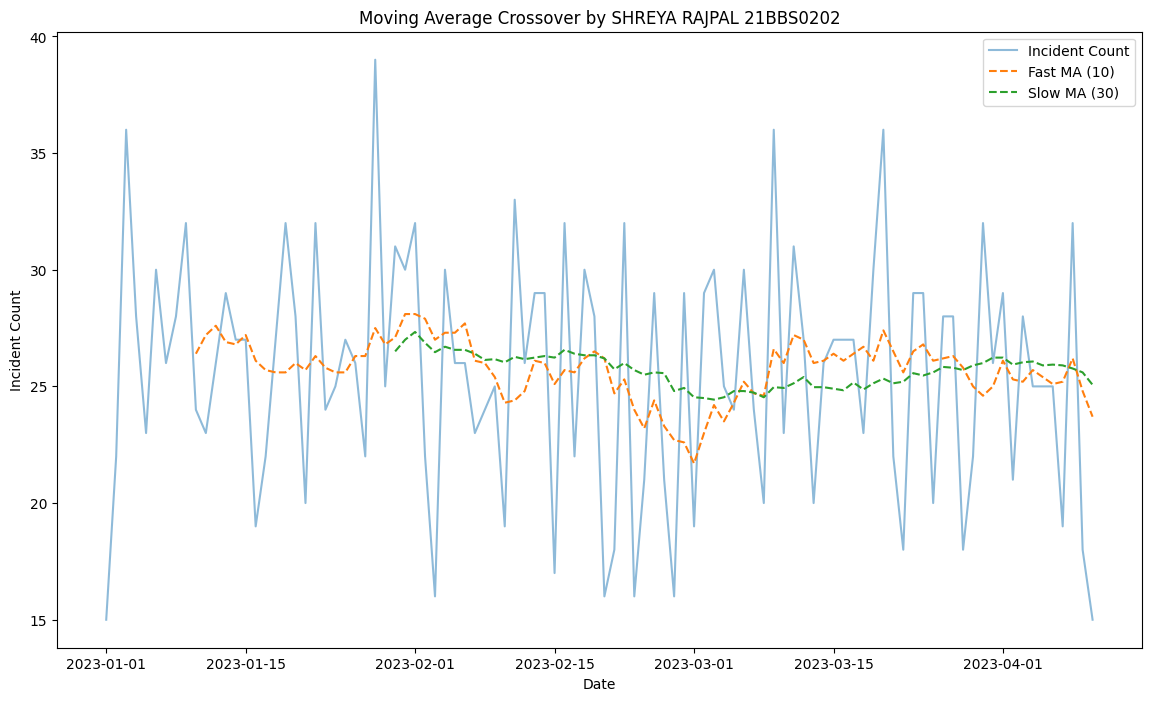

Moving averages saved to 'crime_moving_averages.csv'.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "synthetic_crime_data.csv"  # Replace with your dataset file path
crime_data = pd.read_csv(file_path)

# Preprocess to create time series data
crime_data['Date'] = pd.to_datetime(crime_data['Date'])
daily_incidents = crime_data.groupby('Date').size().reset_index(name='Incident_Count')
daily_incidents.set_index('Date', inplace=True)

# Define functions for different moving averages
def weighted_moving_average(data, window):
    weights = np.arange(1, window + 1)
    return data.rolling(window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

def hull_moving_average(data, window):
    half_window = int(window / 2)
    sqrt_window = int(np.sqrt(window))
    wma_half = weighted_moving_average(data, half_window)
    wma_full = weighted_moving_average(data, window)
    hull_ma = weighted_moving_average(2 * wma_half - wma_full, sqrt_window)
    return hull_ma

# Compute Moving Averages
daily_incidents['Simple_MA_30'] = daily_incidents['Incident_Count'].rolling(window=30).mean()
daily_incidents['Exponential_MA_30'] = daily_incidents['Incident_Count'].ewm(span=30).mean()
daily_incidents['Weighted_MA_30'] = weighted_moving_average(daily_incidents['Incident_Count'], 30)
daily_incidents['Hull_MA_30'] = hull_moving_average(daily_incidents['Incident_Count'], 30)

# Moving Average Crossover
daily_incidents['Fast_MA'] = daily_incidents['Incident_Count'].rolling(window=10).mean()
daily_incidents['Slow_MA'] = daily_incidents['Incident_Count'].rolling(window=30).mean()

# Plot all Moving Averages
plt.figure(figsize=(14, 8))
plt.plot(daily_incidents['Incident_Count'], label="Incident Count", alpha=0.5)
plt.plot(daily_incidents['Simple_MA_30'], label="Simple MA (30)", linestyle='--')
plt.plot(daily_incidents['Exponential_MA_30'], label="Exponential MA (30)", linestyle='--')
plt.plot(daily_incidents['Weighted_MA_30'], label="Weighted MA (30)", linestyle='--')
plt.plot(daily_incidents['Hull_MA_30'], label="Hull MA (30)", linestyle='--')
plt.title("Moving Averages on Crime Incidents by SHREYA RAJPAL 21BBS0202")
plt.xlabel("Date")
plt.ylabel("Incident Count")
plt.legend()
plt.show()

# Plot Moving Average Crossover
plt.figure(figsize=(14, 8))
plt.plot(daily_incidents['Incident_Count'], label="Incident Count", alpha=0.5)
plt.plot(daily_incidents['Fast_MA'], label="Fast MA (10)", linestyle='--')
plt.plot(daily_incidents['Slow_MA'], label="Slow MA (30)", linestyle='--')
plt.title("Moving Average Crossover by SHREYA RAJPAL 21BBS0202")
plt.xlabel("Date")
plt.ylabel("Incident Count")
plt.legend()
plt.show()

# Save results
daily_incidents.to_csv("crime_moving_averages.csv", index=True)
print("Moving averages saved to 'crime_moving_averages.csv'.")
